In [11]:
!pip uninstall langgraph --yes
!pip install langgraph --yes
# !pip install langgraph<0.7.0
# !pip install langmem==0.0.29
!pip install langmem --upgrade

Found existing installation: langgraph 0.6.11
Uninstalling langgraph-0.6.11:
  Successfully uninstalled langgraph-0.6.11

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes
  Using cached langmem-0.0.30-py3-none-any.whl (67 kB)
  Using cached langgraph-1.0.5-py3-none-any.whl (157 kB)
  Using cached langgraph_sdk-0.3.0-py3-none-any.whl (66 kB)
  Using cached langgraph_prebuilt-1.0.5-py3-none-any.whl (35 kB)
INFO: pip is looking at multiple versions of langchain-text-splitters to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_text_splitters-0.3.11-py3-none-any.whl (33 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 12.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of httpcore to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 14.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of httpx to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 6.2 MB

In [12]:
from langgraph.prebuilt import create_react_agent
from langgraph.store.memory import InMemoryStore
from langmem import create_manage_memory_tool, create_search_memory_tool
from langchain_core.messages import HumanMessage

ImportError: cannot import name 'NOT_PROVIDED' from 'langgraph.store.base' (/opt/venv/lib/python3.10/site-packages/langgraph/store/base/__init__.py)

In [ ]:
from dotenv import load_dotenv
load_dotenv()

In [3]:
store = InMemoryStore(
    index={
        "dims": 1536,
        "embed": "openai:text-embedding-3-small",
    }
)

/Users/henriquesantana/Projects/Udacity/agents/.venv/lib/python3.11/site-packages/langgraph/store/base/embed.py:95: LangChainBetaWarning: The function `init_embeddings` is in beta. It is actively being worked on, so the API may change.
  return init_embeddings(embed)


In [4]:
agent = create_react_agent(
    model="openai:gpt-4o-mini",
    tools=[
        # Memory tools use LangGraph's BaseStore for persistence
        create_manage_memory_tool(namespace=("memories",)),
        create_search_memory_tool(namespace=("memories",)),
    ],
    store=store,
)

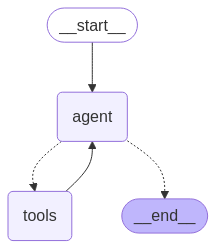

In [5]:
agent

In [6]:
agent.get_input_jsonschema()

{'$defs': {'BaseMessage': {'additionalProperties': True,
   'description': 'Base abstract message class.\n\nMessages are the inputs and outputs of ChatModels.',
   'properties': {'content': {'anyOf': [{'type': 'string'},
      {'items': {'anyOf': [{'type': 'string'}, {'type': 'object'}]},
       'type': 'array'}],
     'title': 'Content'},
    'additional_kwargs': {'title': 'Additional Kwargs', 'type': 'object'},
    'response_metadata': {'title': 'Response Metadata', 'type': 'object'},
    'type': {'title': 'Type', 'type': 'string'},
    'name': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'default': None,
     'title': 'Name'},
    'id': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'default': None,
     'title': 'Id'}},
   'required': ['content', 'type'],
   'title': 'BaseMessage',
   'type': 'object'}},
 'properties': {'messages': {'items': {'$ref': '#/$defs/BaseMessage'},
   'title': 'Messages',
   'type': 'array'}},
 'required': ['messages'],
 'title': 'LangGra

In [7]:
# Ask a random question to the agent
output = agent.invoke(
    input = {
        "messages": [
            {
                "role": "user", 
                "content": "What are my lighting preferences?"
            }
        ]
    },
    config = {"configurable": {"thread_id": "1"}}
)

output['messages']

[HumanMessage(content='What are my lighting preferences?', additional_kwargs={}, response_metadata={}, id='dc7df825-5f5b-48fa-9f13-40975b894262'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lpIavBJHUIbKBuFyRlkuTA4Q', 'function': {'arguments': '{"query":"lighting preferences","limit":5}', 'name': 'search_memory'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 245, 'total_tokens': 265, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e085bd65-bbcc-4b28-97a6-068d3f6780b3-0', tool_calls=[{'name': 'search_memory', 'args': {'query': 'lighting preferences', 'limit': 5}, 'id': 'call_lpIavBJHUIbKBuFyRlkuTA4Q',

In [8]:
messages = output['messages']

In [9]:
messages.append(HumanMessage("Ok. Remember that I prefer dark mode."))

In [10]:
# Store a new memory in one Session
output = agent.invoke(
    input = {
        "messages": messages,
    },
    config = {"configurable": {"thread_id": "1"}}
)

output['messages']

[HumanMessage(content='What are my lighting preferences?', additional_kwargs={}, response_metadata={}, id='dc7df825-5f5b-48fa-9f13-40975b894262'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lpIavBJHUIbKBuFyRlkuTA4Q', 'function': {'arguments': '{"query":"lighting preferences","limit":5}', 'name': 'search_memory'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 245, 'total_tokens': 265, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e085bd65-bbcc-4b28-97a6-068d3f6780b3-0', tool_calls=[{'name': 'search_memory', 'args': {'query': 'lighting preferences', 'limit': 5}, 'id': 'call_lpIavBJHUIbKBuFyRlkuTA4Q',

In [11]:
# Retrieve the stored memory in another Session
output = agent.invoke(
    {
        "messages": [
            {
                "role": "user", 
                "content": "What are my lighting preferences?"
            }
        ]
    },
    config = {"configurable": {"thread_id": "2"}}
)

output['messages']

[HumanMessage(content='What are my lighting preferences?', additional_kwargs={}, response_metadata={}, id='d1303698-d904-475f-9a21-e4ac8e5b8c1d'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Te9D38JZHMsxIVKlh0sVqa9A', 'function': {'arguments': '{"query":"lighting preferences"}', 'name': 'search_memory'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 245, 'total_tokens': 261, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ecd7e2f0-5c0a-4f53-bc7a-529429532b7b-0', tool_calls=[{'name': 'search_memory', 'args': {'query': 'lighting preferences'}, 'id': 'call_Te9D38JZHMsxIVKlh0sVqa9A', 'type': 'tool_call'}]